<a href="https://colab.research.google.com/github/ArinaOwl/multilayer_perceptron/blob/main/DataAnalisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предварительный анализ и подготовка данных

Рассматриваемая база данных: https://www.kaggle.com/muhakabartay/sloan-digital-sky-survey-dr16/data

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
#запишем файл с данными в датафрейм data
data = pd.read_csv('Skyserver_12_30_2019 4_49_58 PM.csv')
#выведем информацию о форме датафрейма
print(data.shape)
#выведем первые 5 строк датафрейма
data.head()

(100000, 18)


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


In [ ]:
#категории целевой переменной 'class' и их распределение
print(data['class'].value_counts())

GALAXY    51323
STAR      38096
QSO       10581
Name: class, dtype: int64


In [ ]:
#добавление новой переменную 'classid', содержащей закодированную целевую переменную
data['classid'] = data['class'].map({'STAR': 0, 'GALAXY': 1, 'QSO': 2})

In [ ]:
# Посмотрим на частоты категорий переменных
for col in data:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

objid DISTRIBUTION
1237657610727590000    22
1237665548887260000    18
1237659326031200000    18
1237666338115030000    17
1237661384387790000    17
                       ..
1237652899686650000     1
1237661357004160000     1
1237678860082940000     1
1237668349746410000     1
1237665127472630000     1
Name: objid, Length: 67951, dtype: int64

ra DISTRIBUTION
32.999614     2
320.826360    2
339.360112    1
349.244019    1
201.306745    1
             ..
173.947706    1
239.671712    1
180.764825    1
339.861943    1
132.119989    1
Name: ra, Length: 99998, dtype: int64

dec DISTRIBUTION
1.217895     2
1.255067     2
42.301629    1
39.671212    1
49.559395    1
            ..
13.464208    1
28.584467    1
25.654638    1
32.938110    1
58.561858    1
Name: dec, Length: 99998, dtype: int64

u DISTRIBUTION
19.34645    6
19.49681    6
19.26802    6
19.54784    6
19.58681    6
           ..
17.88266    1
17.98015    1
18.75827    1
18.00870    1
18.77445    1
Name: u, Length: 79840, dtype: 

In [ ]:
# rerun содержит только одно значение (одинаковое для всех данных)
print(f"{data['rerun']} DISTRIBUTION")
print(data['rerun'].value_counts())
print()

0        301
1        301
2        301
3        301
4        301
        ... 
99995    301
99996    301
99997    301
99998    301
99999    301
Name: rerun, Length: 100000, dtype: int64 DISTRIBUTION
301    100000
Name: rerun, dtype: int64



Смысловой анализ названий оставшихся колонок показал, что из датафрейма можно удалить колонки: ra (прямое восхождение), dec (склонение) и mjd (дата наблюдения), так как они в совокупности характеризуют исследуемый сектор небосклона в дату наблюдения и не имеют отношения к типу наблюдаемого объекта. Также можно удалить колонки run (номер наблюдения), camcol (номер колонки камеры), field (номер поля камеры) и plate (номер пластины), не имеющие влияния на тип наблюдаемого объекта,  и все идентификационные переменные (objid, specobjid, fiberid).

In [ ]:
# удалим ненужные колонки
data.drop(['objid', 'specobjid', 'fiberid', 'ra', 'dec', 'mjd', 'run', 'rerun', 'camcol', 'field', 'plate'], 
          axis = 1, inplace = True)
#выведем первые 5 строк датафрейма
data.head()

,u,g,r,i,z,class,redshift,classid
0,18.69254,17.13867,16.55555,16.34662,16.17639,STAR,0.000115,0
1,18.47633,17.30546,17.24116,17.32780,17.37114,STAR,-0.000093,0
2,16.47714,15.31072,15.55971,15.72207,15.82471,STAR,0.000165,0
3,18.63561,16.88346,16.09825,15.70987,15.43491,GALAXY,0.058155,1
4,18.88325,17.87948,17.47037,17.17441,17.05235,GALAXY,0.072210,1


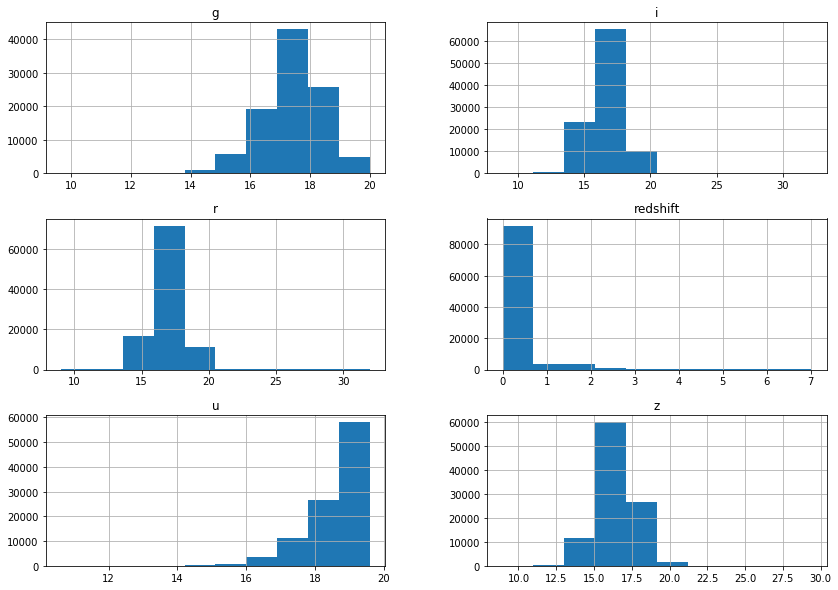

In [ ]:
# Проанализируем статистическое распредление значений в выбранных колонках
data.hist(['u', 'g', 'r', 'i', 'z', 'redshift'], figsize=(14, 10))
None

In [ ]:
# Посмотрим насколько коррелируют между собой выбранные для анализа характеристики
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,u,g,r,i,z,redshift,classid
u,1,0.84,0.69,0.62,0.56,0.17,0.25
g,0.84,1,0.96,0.92,0.89,0.42,0.34
r,0.69,0.96,1,0.98,0.96,0.45,0.28
i,0.62,0.92,0.98,1,0.98,0.45,0.22
z,0.56,0.89,0.96,0.98,1,0.44,0.17
redshift,0.17,0.42,0.45,0.45,0.44,1,0.63
classid,0.25,0.34,0.28,0.22,0.17,0.63,1


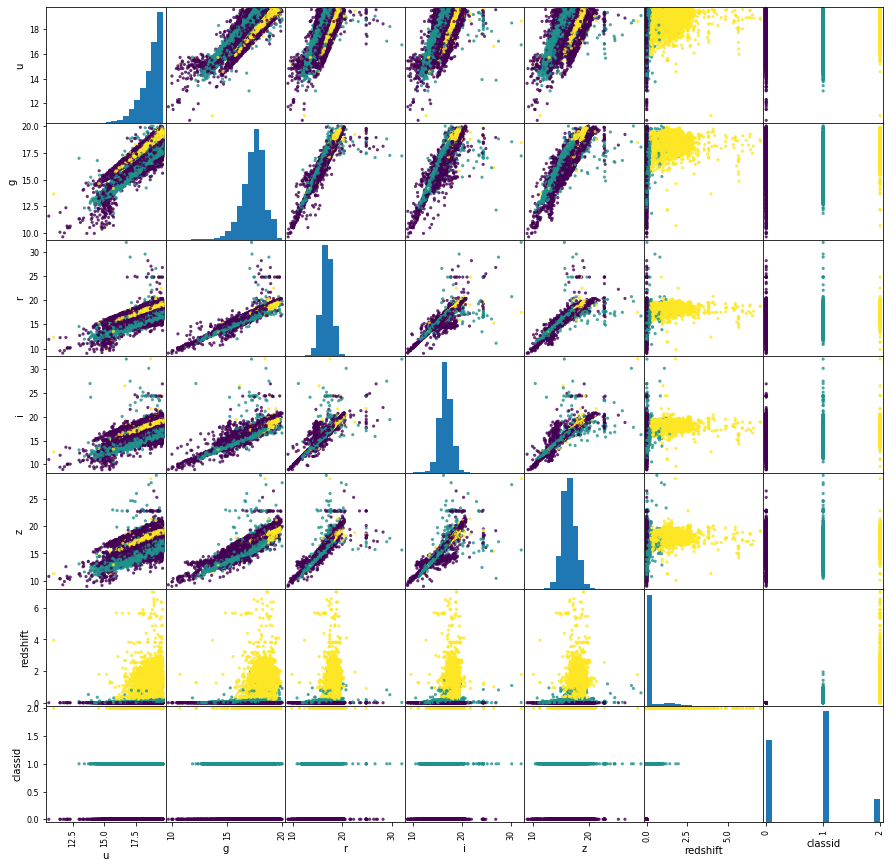

In [ ]:
pd.plotting.scatter_matrix(data, c=data['classid'], figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=10, alpha=0.8)
None